In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta
import requests
import io
proxy_dict = {
    'http': "http://J0438567@10.16.152.74:8080",
    'https': "http://J0438567@10.16.152.74:8080"
}

In [2]:
url = "https://www.data.gouv.fr/fr/datasets/r/dd0de5d9-b5a5-4503-930a-7b08dc0adc7c"
req = requests.get(url, proxies=proxy_dict).text
df_raw = pd.read_csv(io.StringIO(req), sep=';', parse_dates=['jour'], index_col='jour')
df_raw = df_raw[df_raw['cl_age90'] == 0].drop(['cl_age90'], axis=1)
df_raw['pos_semaine'] = df_raw.index.weekday
if df_raw['pos_semaine'].iloc[-1] < 5:
    df = df_raw[df_raw['pos_semaine']<5].resample('W').mean()
else:
    df = df_raw.resample('W').mean()
df['I'] = df['P'] / df['T']
df.tail()

,P_f,P_h,P,T_f,T_h,T,pop,pos_semaine,I
jour,,,,,,,,,
2020-12-13,7824.6,6195.2,14072.8,131411.2,101159.0,233222.2,67114995.0,2.0,0.060341
2020-12-20,9394.0,7447.4,16896.2,208543.0,166739.0,376389.2,67114995.0,2.0,0.044890
2020-12-27,7821.0,6323.6,14184.4,293279.4,240920.0,535467.2,67114995.0,2.0,0.026490
2021-01-03,8793.8,7207.6,16042.8,169502.8,136992.0,307075.4,67114995.0,2.0,0.052244
2021-01-10,12425.0,10355.5,22849.0,196829.5,153731.0,351379.5,67114995.0,1.5,0.065027


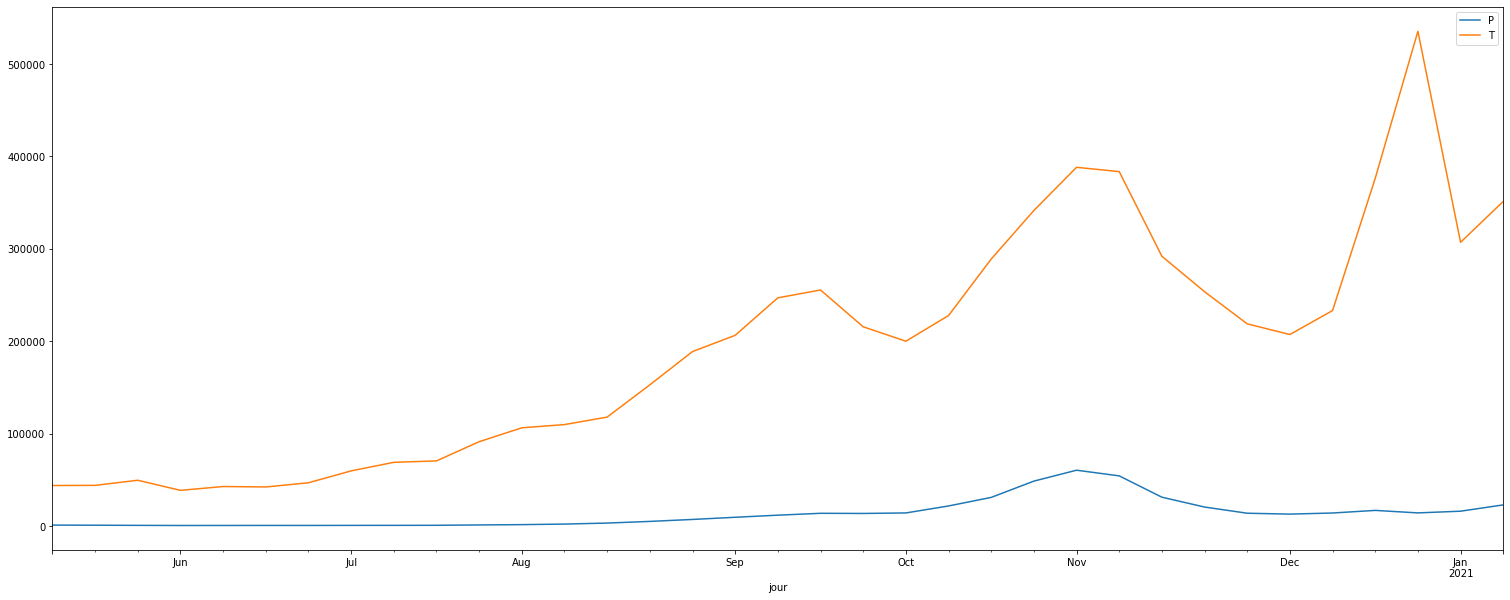

In [8]:
df.loc[:, ['P', 'T']].plot(figsize=(26, 10))
plt.show()

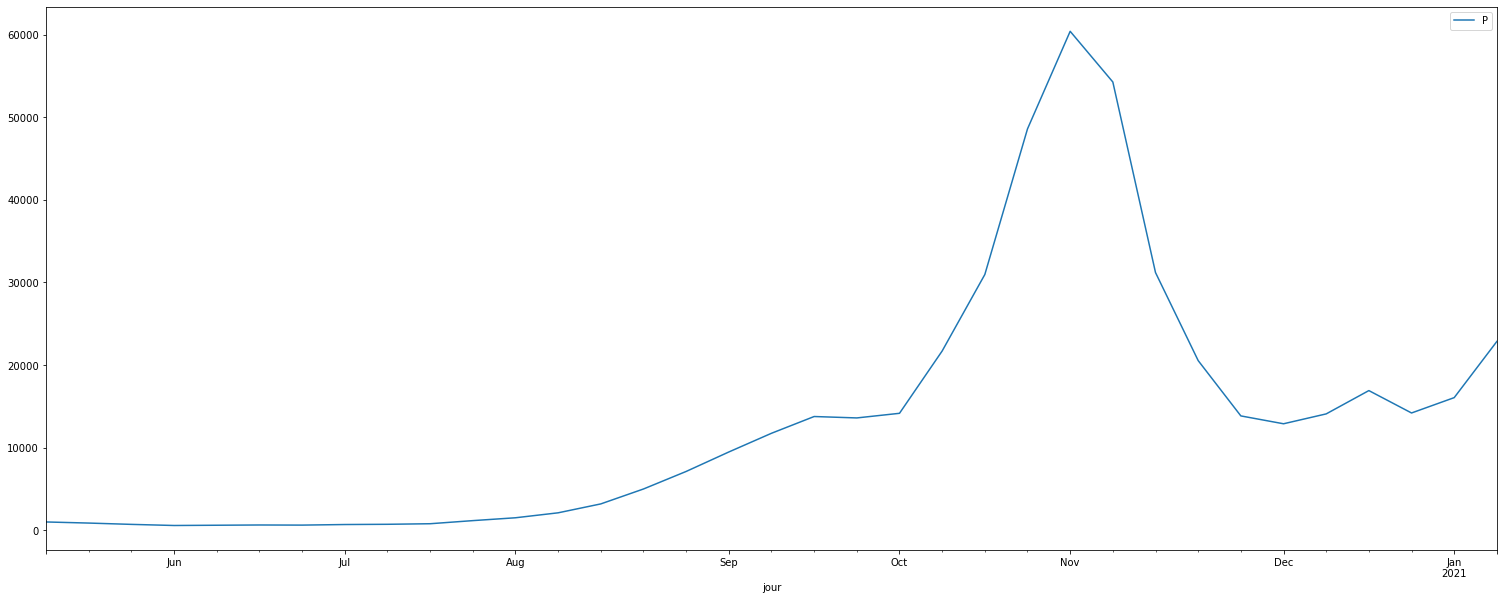

In [6]:
df.loc[:, ['P']].plot(figsize=(26, 10))
plt.show()

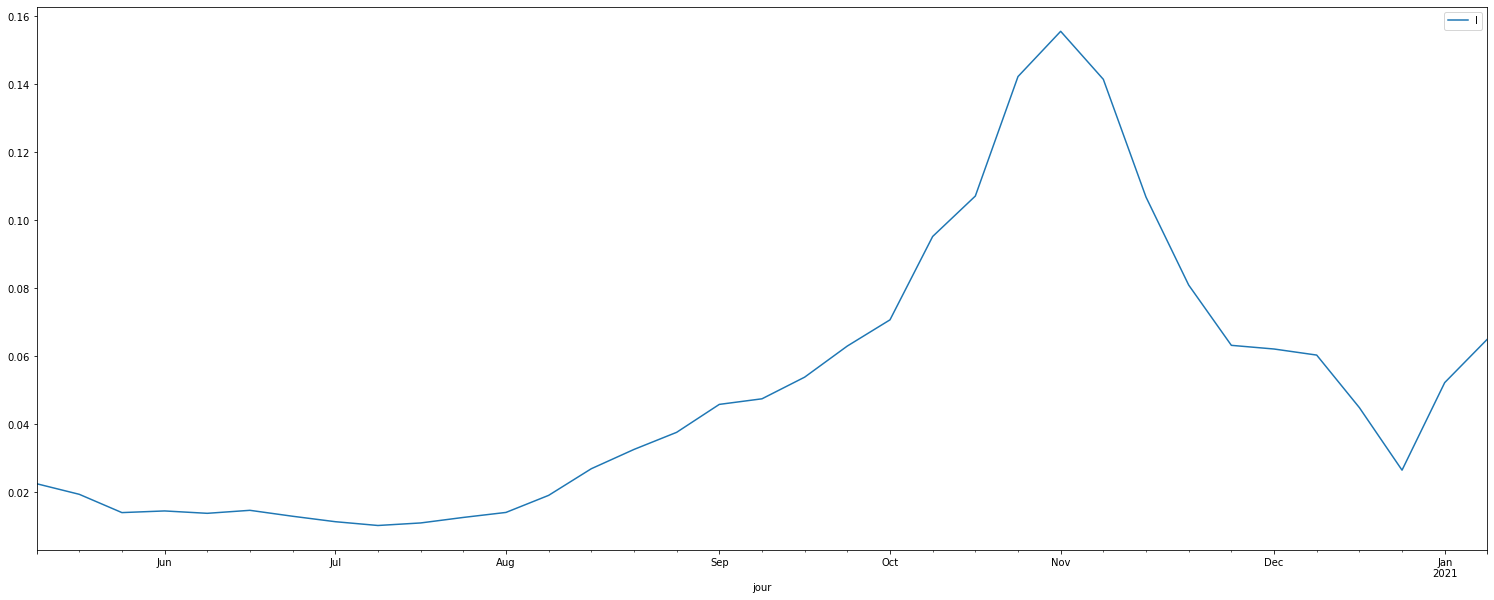

In [7]:
df.loc[:, ['I']].plot(figsize=(26, 10))
plt.show()